# [NLP] Assignment 1: Tokenization

In this assignment, you need to tokenize the text of the Twitter(X) users posts(tweets). The assignment consists of two tasks. When you finish all the tasks, create a GitHub repository for this assignment (you can use this repo later for the other assignments) and submit this notebook in the repository. Leave `requirements.txt` file if your code requires additional installations. Submit the link to the repository in Moodle.

The [data](https://drive.google.com/file/d/15x_wPAflvYQ2Xh38iNQGrqUIWLj5l5Nw/view?usp=share_link) contains 5 files whereby each contains 44 tweets. Each tweet is separated by a newline.

## Task 1. Tokenize some tweets manually (20 points)

As a first task you need to tokenize first 15 tweets from `file2` by hand. This will allow you to understand the problem from a linguistic point of view. The guidelines for tweet tokenization are as follows:

- Each smiley is a separate token
- Each hashtag is an individual token. Each user reference is an individual token
- If a word has spaces between them then it is converted to a single token
- All punctuations are individual tokens. This includes double-quotes and single quotes also
- A URL is a single token

Example of output

    Input tweet
    @xfranman Old age has made N A T O!

    Tokenized tweet (separated by comma)
    @xfranman , Old , age , has , made , NATO , !

In [1]:
import pandas as pd
from collections import defaultdict, Counter
from pprint import pprint
import matplotlib.pyplot as plt


In [2]:
with open("/content/file2") as f:
  data = f.readlines()
for i in range(15):
  print(f'{i+1}.', data[i])


1. Camping in Maine for the weekend. Hey Dad, Mama Loves YOU: http://www.mamapalooza.com

2. Its american tradition bitch

3. @ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I'm sure I hear a tiny squeak... Then louder ones

4. " RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I'm happy, I tweet because I'm free"" LOL!"

5. Samsung Mini S2 portable HDD graced with colors that perfectly match your tacky beach gear: Sammy's done it aga.. http://tinyurl.com/lb5p6m

6. @dialloc congrats on finding your way over. it may be slow going at first. hang in there. it's kinda cool when u get up to speed.

7. iPhone activation delays continue, Apple offers $30 http://twt.gs/l3Ki

8. RT @GoogleAtWork Gmail maximum attachment size now 25MB http://bit.ly/62mjw Nice!!!

9. RT @acfou The Ads Won Awards for Crispin; But Did Nothing for Client BurgerKing's Sales/Marketshare - Big Surprise - http://ping.fm/vw8TI

10. Hey doll! Great I missed 

Input tweet
@xfranman Old age has made N A T O!

Tokenized tweet (separated by comma)
@xfranman , Old , age , has , made , NATO , !


    1. Input tweet
       Camping in Maine for the weekend. Hey Dad, Mama Loves YOU: http://www.mamapalooza.com
    1. Tokenized tweet
       Camping, in, Maine, for, the, weekend, ., Hey, Dad, , , Mama, Loves, YOU, :,  http://www.mamapalooza.com
    2. Input tweet
       Its american tradition bitch
    2. Tokenized tweet
       Its, american, tradition, bitch
    3. Input tweet
       @ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I'm sure I hear a tiny squeak... Then louder ones
    3. Tokenized tweet
       @ThroughTheVoid, They, love, it, !, The, only, pleasure, they, get, in, life, ., I, actually, do, that, ., I'm, sure, I, hear, a, tiny, squeak, ... , Then, louder, ones
    4. Input tweet
       " RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I'm happy, I tweet because I'm free"" LOL!"
    4. Tokenized tweet
       ", RT, @latti, :, @AbsoHilare, stop, tweeting, in, church, !, Lol, <---, ", ", I, tweet, because, I'm, happy, ,, I, tweet, because, I'm, free, ",", LOL, ! , "
    5. Input tweet
       Samsung Mini S2 portable HDD graced with colors that perfectly match your tacky beach gear: Sammy's done it aga.. http://tinyurl.com/lb5p6m
    5. Tokenized tweet
       Samsung, Mini, S2, portable, HDD, graced, with, colors, that, perfectly, match, your, tacky, beach, gear, :, Sammy's,  done, it, aga, ..,  http://tinyurl.com/lb5p6m
    6. Input tweet
     @dialloc congrats on finding your way over. it may be slow going at first. hang in there. it's kinda cool when u get up to speed.
    6. Tokenized tweet
     @dialloc, congrats, on, finding, your, way, over, ., it, may, be, slow, going, at, first, ., hang, in, there, ., it's, kinda, cool, when, u, get, up, to, speed, .
    7. Input tweet
     iPhone activation delays continue, Apple offers $30 http://twt.gs/l3Ki
    7. Tokenized tweet
     iPhone, activation, delays, continue, ,, Apple, offers, $30, http://twt.gs/l3Ki
    8. Input tweet
     RT @GoogleAtWork Gmail maximum attachment size now 25MB http://bit.ly/62mjw Nice!!!
    8. Tokenized tweet
     RT, @GoogleAtWork, Gmail, maximum, attachment, size, now, 25MB, http://bit.ly/62mjw Nice, !!!
    9. Input tweet
     RT @acfou The Ads Won Awards for Crispin; But Did Nothing for Client BurgerKing's Sales/Marketshare - Big Surprise - http://ping.fm/vw8TI
    9. Tokenized tweet
     RT, @acfou, The, Ads, Won, Awards, for, Crispin, ;, But, Did, Nothing, for, Client, BurgerKing's, Sales/Marketshare, -, Big, Surprise, -, http://ping.fm/vw8TI
    10. Input tweet
     Hey doll! Great I missed True Blood yday boo lol Rt @FrankBanuat78 @jhillstephens Hello Sunshine how are u today? :-)
    10. Tokenized tweet
     Hey, doll, !, Great, I, missed, True, Blood, yday, boo, lol, Rt, @FrankBanuat78, @jhillstephens, Hello, Sunshine, how, are, u, today, ?, :-)
    11. Input tweet
     Australian artist Pogo made these free songs primarily from sampled audio from Alice In Wonderland. http://www.last.fm/music/Pogo/Wonderland
    11. Tokenized tweet
     Australian, artist, Pogo, made, these, free, songs, primarily, from, sampled, audio, from, Alice, In, Wonderland, ., http://www.last.fm/music/Pogo/Wonderland
    12. Input tweet
     @mppritchard they wanted to sell all the preorders & then sell all of the ones they had in stock to those that just walked in. Can't do both
    12. Tokenized tweet
     @mppritchard, they, wanted, to, sell, all, the, preorders, &, then, sell, all, of, the, ones, they, had, in, stock, to, those, that, just, walked, in, ., Can't, do, both
    13. Input tweet
     Incoming: Frightened Rabbit, Sept. 22 (Tucson): If Fat Cat Records is going to send three great bands from Scot.. http://tinyurl.com/nz6xcv
    13. Tokenized tweet
     Incoming, :, Frightened, Rabbit, ,, Sept, ., 22, (Tucson), :,  If, Fat, Cat, Records, is, going, to, send, three, great, bands, from, Scot.. ,http://tinyurl.com/nz6xcv
    14. Input tweet
     Hey @ginoandfran please greet philip! (GinoandFran live > http://ustre.am/2YyQ)
    14. Tokenized tweet
     Hey, @ginoandfran, please, greet, philip, !, (, GinoandFran, live, >, http://ustre.am/2YyQ, )
    15. Input tweet
     Ik weet niet wie er achter de T-Mobile iPhone Twitter zit maar ik vind het niet echt 'corporate' taalgebruik... Best vreemd eigenlijk
    15. Tokenized tweet
     Ik, weet, niet, wie, er, achter, de, T-Mobile, iPhone, Twitter, zit, maar, ik, vind, het, niet, echt, 'corporate', taalgebruik, ..., Best, vreemd, eigenlijk


## Task 2. Implement [Byte-Pair Encoding(BPE)](https://arxiv.org/pdf/1508.07909.pdf) Tokenizer (80 points)

### Task 2.1. Implementation (60 points)

Implement the tokenizer as the BPETokenizer class:
* Implement `train` method that learns merges and builds the vocabulary of the specified `vocab_size` (25 points).
* Implement `tokenize` method that should tokenize the text according to the learnt merges (25 points).

Your code should have docstrings and comments (10 points).

In [4]:
from collections import Counter, defaultdict

class BPE:
    def __init__(self, data, vocab_size):
        """
        Initializes the BPE tokenizer.

        Parameters:
        - data: list of strings. The dataset used for training.
        - vocab_size: int. The desired size of the vocabulary.
        """
        self.data = data
        self.vocab_size = vocab_size
        self.vocab = []
        self.word_freq = Counter()
        self.splits = {}
        self.merges = {}

    def train(self):
        """Train a BPE Tokenizer"""
        self._count_word_frequency()
        self._initialize_splits()

        alphabet = set("".join(self.word_freq.keys())) | {"</w>"}
        self.vocab = sorted(alphabet)

        while len(self.vocab) < self.vocab_size:
            pair_freq = self._get_pairs_freq()
            if not pair_freq:
                print("No pair available")
                break
            pair = max(pair_freq, key=pair_freq.get)
            self._update_splits(pair)
            self.merges[pair] = "".join(pair)
            self.vocab.append("".join(pair))

    def _count_word_frequency(self):
        """Count the word frequency"""
        for tweet in self.data:
            words = tweet.split()
            self.word_freq.update(words)

    def _initialize_splits(self):
        """Initialize the splits"""
        for word in self.word_freq:
            self.splits[word] = list(word) + ["</w>"]

    def _update_splits(self, pair):
        """Merge the most frequent pair in the splits"""
        lhs, rhs = pair
        for word, word_split in self.splits.items():
            new_split = []
            cursor = 0
            while cursor < len(word_split):
                if (
                    word_split[cursor] == lhs
                    and cursor + 1 < len(word_split)
                    and word_split[cursor + 1] == rhs
                ):
                    new_split.append(lhs + rhs)
                    cursor += 2
                else:
                    new_split.append(word_split[cursor])
                    cursor += 1
            self.splits[word] = new_split

    def _get_pairs_freq(self):
        """Compute the pair frequency"""
        pairs_freq = defaultdict(int)
        for word, freq in self.word_freq.items():
            split = self.splits[word]
            for i in range(len(split)):
                if i + 1 < len(split):
                    pairs_freq[(split[i], split[i + 1])] += freq
        return pairs_freq

    def tokenize(self, s):
        """
        Tokenize the input string using the trained BPE tokenizer.

        Parameters:
        - s: str. Input string to tokenize.

        Returns:
        - list of str. Tokenized representation of the input string.
        """
        splits = [list(t) + ["</w>"] for t in s.split()]

        for lhs, rhs in self.merges:
            for split in splits:
                new_split = []
                cursor = 0
                while cursor < len(split):
                    if (
                        cursor + 1 < len(split)
                        and split[cursor] == lhs
                        and split[cursor + 1] == rhs
                    ):
                        new_split.append(lhs + rhs)
                        cursor += 2
                    else:
                        new_split.append(split[cursor])
                        cursor += 1
                split[:] = new_split

        return [token for split in splits for token in split]


In [5]:
# Example usage:
filenames = ['/content/file4', '/content/file4', "/content/file3", "/content/file5", "/content/file4"]
with open('/content/output', 'w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            outfile.write(infile.read())
with open("/content/output") as f:
  corpus = f.readlines()

data = corpus


### Task 2.2. Analysis on Tweets Dataset (10 points)

Train the BPE tokenizer on the tweets dataset. Try to tokenize the tweets with the tokenizer of different `vocab_size`. For example, train the BPE tokenizer with `vocab_size` of [base_vocab_size, 250, 500, 750, 1000]. Plot the dependency of the average length of the tokenized tweet by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized tweet on average. Tell what `vocab_size` is preferrable and why.

In [6]:
avg_len = []
lenght = [250, 500, 750, 1000, 1250, 1500]
for i in lenght:
  counter = 0
  avg = 0
  bpe = BPE(data, i)
  bpe.train()
  for j in range(len(data)):
    tokens = bpe.tokenize(data[j])
    # print(tokens)
    counter+=len(tokens)

  avg = counter/len(data)
  avg_len.append(avg)
print(avg_len)

[61.663636363636364, 47.35, 40.92272727272727, 36.768181818181816, 33.35909090909091, 29.95]


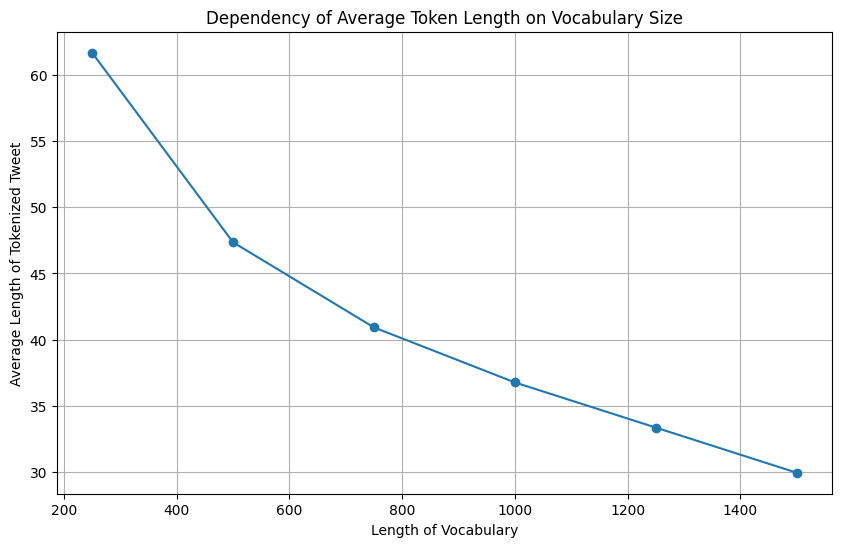

In [7]:
length_avg_len_tuples = [(250, avg_len[0]), (500, avg_len[1]), (750, avg_len[2]), (1000, avg_len[3]), (1250, avg_len[4]), (1500, avg_len[5])]
lengths, avg_lens = zip(*length_avg_len_tuples)

plt.figure(figsize=(10,  6))
plt.plot(lengths, avg_lens, marker='o')
plt.xlabel('Length of Vocabulary')
plt.ylabel('Average Length of Tokenized Tweet')
plt.title('Dependency of Average Token Length on Vocabulary Size')
plt.grid(True)
plt.show()


Byte Pair Encoding (BPE) is a tokenization method that is used to partition text into subwords. When vocab_size is increased in BPE, we increase the number of subwords that the model can use to represent the text.

When vocab_size is increased, BPE will combine word parts into larger subwords to fit the new vocabulary size. This can cause the same word parts to be merged together to create new tokens. As a result, we will have fewer tokens to represent the same text.

For example, with vocab_size=1000, the word "book printing" can be split into "book" and "printing", while with vocab_size=2000, the same word can be split into "kn" and "igoprinting". Thus, as vocab_size increases, the number of tokens per sentence may decrease due to the larger subwords used to represent the text.

### Task 2.3. Analysis on Dataset of Different Language (10 points)

Find a small dataset of texts in a language other than English. The dataset size should be not greater than several megabytes.

Train the BPE tokenizer on the dataset that you found. Try to tokenize the sentences from this dataset with the tokenizer of different `vocab_size`. Plot the dependency of the average length of the tokenized sentence by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized sentence on average.

Tell how how the average length of the tokenized sentence differs from the average length of the tokenized tweet. Explain why.

In [9]:
# link for downloading: https://drive.google.com/file/d/1qRu5ih0S1GRYnkUbcVDOYkOHDFdRT-N-/view?usp=sharing
dataset = pd.read_csv("/content/data.csv")
dataset.head()

,tweet
0,Heureusement que le côté Compassion et Pratiqu...
1,#immobilier #COVID2019 #CoronavirusFrance #loc...
2,RT @MathildePanot: 🚨 Parce qu’il existe une al...
3,RT @AntoineMaes: Le @RCLens qui galère à monte...
4,RT @holste_max: Un pays où il est plus facile ...


In [10]:
# preparing dataset for further use
s = [i for i in dataset.tweet]
s[:5]

["Heureusement que le côté Compassion et Pratique des Femmes ont toujours soutenu l'Humanité mais dans l'Ombre malheu… https://t.co/8qW82G81s6",
 '#immobilier #COVID2019 #CoronavirusFrance #location \n\nComment faire si on ne peut pas régler son loyer à son baille… https://t.co/JFZhZzonHw',
 'RT @MathildePanot: 🚨 Parce qu’il existe une alternative crédible à ceux qui ne veulent rien changer et qui ne retiennent aucune leçon. \n\n📝…',
 'RT @AntoineMaes: Le @RCLens qui galère à monter depuis des années. Et qui remonte sans finir la saison. Suffisait de pas jouer en fait. #Co…',
 'RT @holste_max: Un pays où il est plus facile de se procurer une kalachnikov que des masques, a un problème. #CoronavirusFrance']

In [11]:
avg_len = []
lenght = [250, 500, 750, 1000, 1250, 1500]
for i in lenght:
  counter = 0
  avg = 0
  bpe = BPE(s, i)
  bpe.train()
  for j in range(len(s)):
    tokens = bpe.tokenize(s[j])
    # print(tokens)
    counter+=len(tokens)

  avg = counter/len(s)
  avg_len.append(avg)
print(avg_len)

[78.2, 58.34, 49.09, 43.2, 38.2, 35.6]


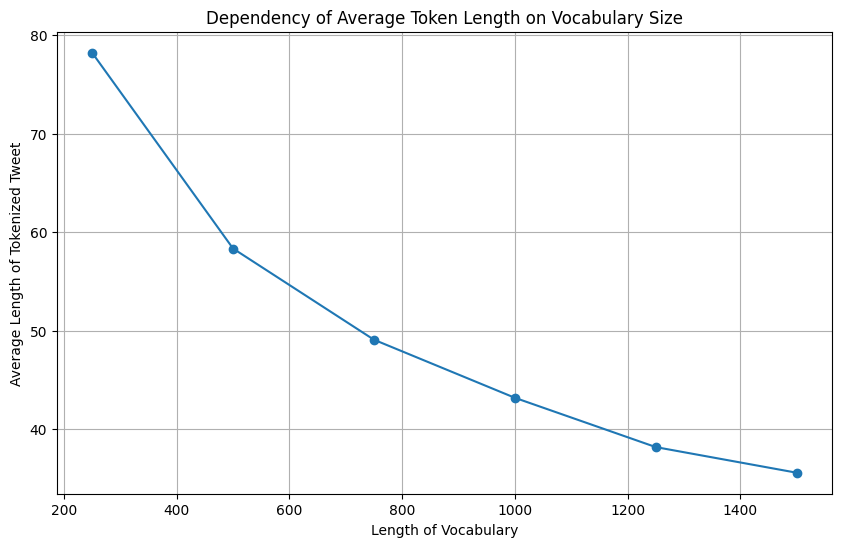

In [12]:
import matplotlib.pyplot as plt


length_avg_len_tuples = [(250, avg_len[0]), (500, avg_len[1]), (750, avg_len[2]), (1000, avg_len[3]), (1250, avg_len[4]), (1500, avg_len[5])]
lengths, avg_lens = zip(*length_avg_len_tuples)

plt.figure(figsize=(10,  6))
plt.plot(lengths, avg_lens, marker='o')
plt.xlabel('Length of Vocabulary')
plt.ylabel('Average Length of Tokenized Tweet')
plt.title('Dependency of Average Token Length on Vocabulary Size')
plt.grid(True)
plt.show()


References:
1. https://alexanderdyakonov.wordpress.com/2019/11/29/токенизация-на-подслова-subword-tokenization/
2. https://huggingface.co/learn/nlp-course/en/chapter6/5
3. https://habr.com/ru/articles/599673/
4. https://martinlwx.github.io/en/the-bpe-tokenizer/